## Covid 19 Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore') # to help remove warning statments along with output

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects/Covid 19 project/Covid_19_Clean_Complete.csv')
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df.shape

(49068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
# Renaming columns
df.rename(columns={'Province/State':'state','Country/Region':'country'},inplace=True)
df.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
# getting value count of Date field
df['Date'].value_counts()

,count
Date,
2020-01-22,261
2020-01-23,261
2020-01-24,261
2020-01-25,261
2020-01-26,261
...,...
2020-07-23,261
2020-07-24,261
2020-07-25,261


In [ ]:
# check max date
df['Date'].max()

'2020-07-27'

In [ ]:
# poulating rows with max date in top
top = df[df['Date'] == '2020-07-27']
top

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
# Grouping all rows based on country
top.groupby(by='country')[['Confirmed','Deaths','Recovered', 'Active']].sum().reset_index()

,country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [ ]:
# Populating all confirmed case in confirmed dataset
confirmed = df.groupby(by='Date').sum()['Confirmed'].reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


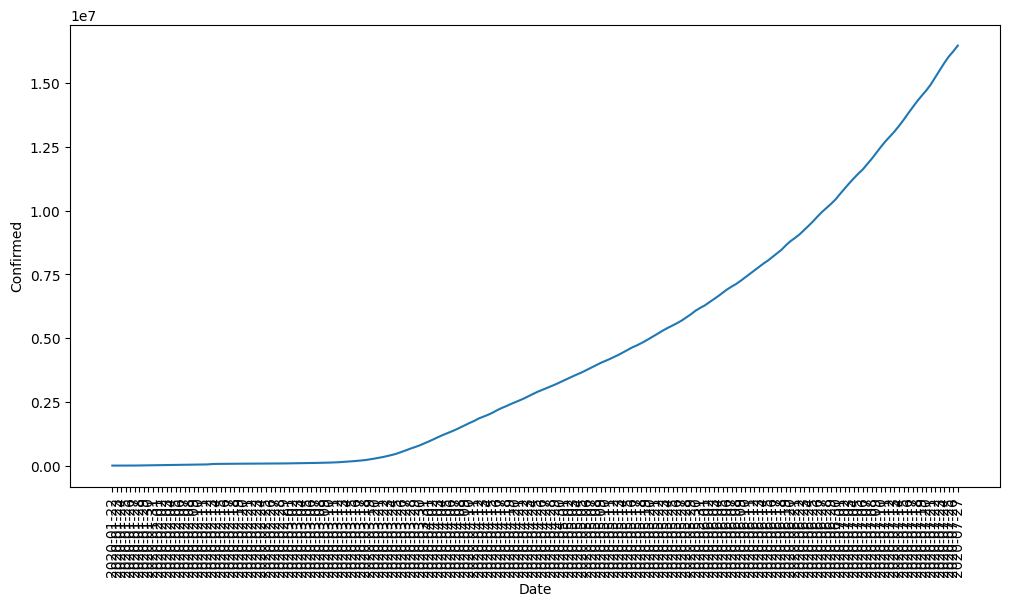

In [ ]:
# Visualizing confirmed case
plt.figure(figsize=(12,6))
sns.lineplot(x='Date',y='Confirmed',data=confirmed)
plt.xticks(rotation=90)
plt.show()

## Top 10 countries with the most recovered cases

In [ ]:
top_10_recovered = df.groupby(by='country')['Recovered'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_recovered

,country,Recovered
0,US,56353416
1,Brazil,54492873
2,Russia,25120448
3,India,23783720
4,Germany,17107839
5,Italy,15673910
6,Iran,15200895
7,Spain,15093583
8,Turkey,13345389
9,Chile,13292593


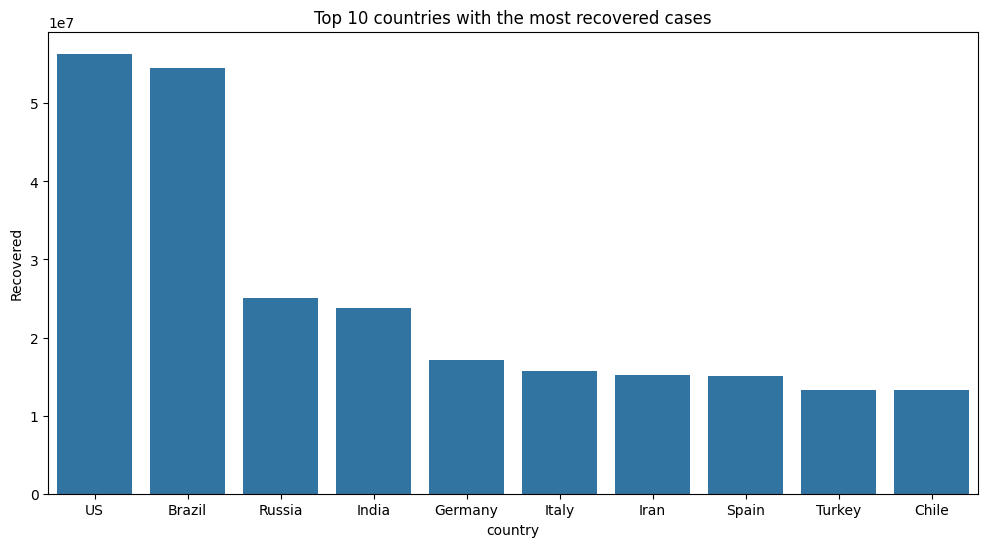

In [ ]:
# Visualizing recovered case
plt.figure(figsize=(12,6))
sns.barplot(x='country',y='Recovered',data=top_10_recovered)
plt.title('Top 10 countries with the most recovered cases')
plt.show()

## Top 10 Countries with deaths

In [ ]:
top_10_deaths = df.groupby(by='country')['Deaths'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_deaths

,country,Deaths
0,US,11011411
1,United Kingdom,3997775
2,Brazil,3938034
3,Italy,3707717
4,France,3048524
5,Spain,3033030
6,Mexico,1728277
7,India,1111831
8,Iran,1024136
9,Belgium,963679


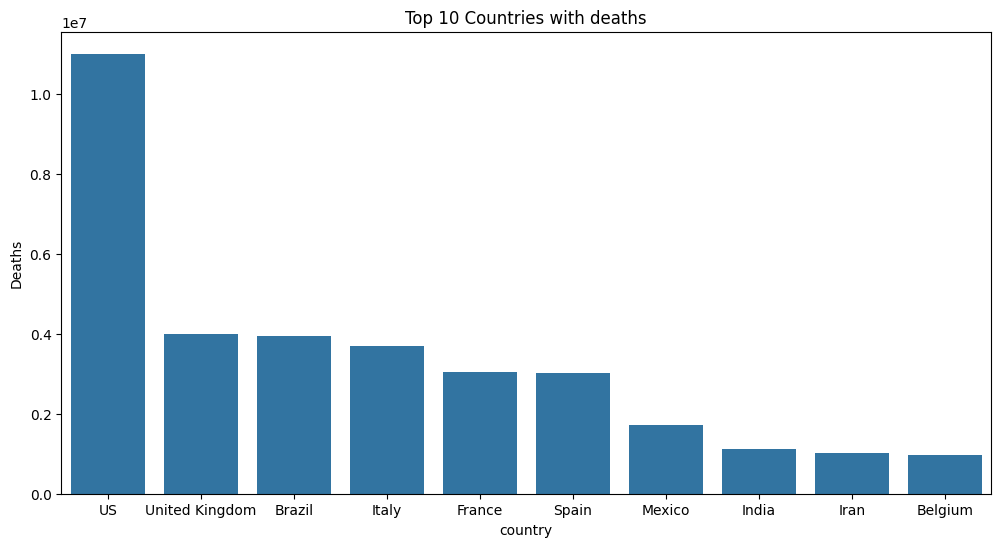

In [ ]:
# visualising death cases
plt.figure(figsize=(12,6))
sns.barplot(x='country',y='Deaths',data=top_10_deaths)
plt.title('Top 10 Countries with deaths')
plt.show()

## Top 10 countries with most active cases

In [ ]:
top_10_active = df.groupby(by='country')['Active'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_active

,country,Active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


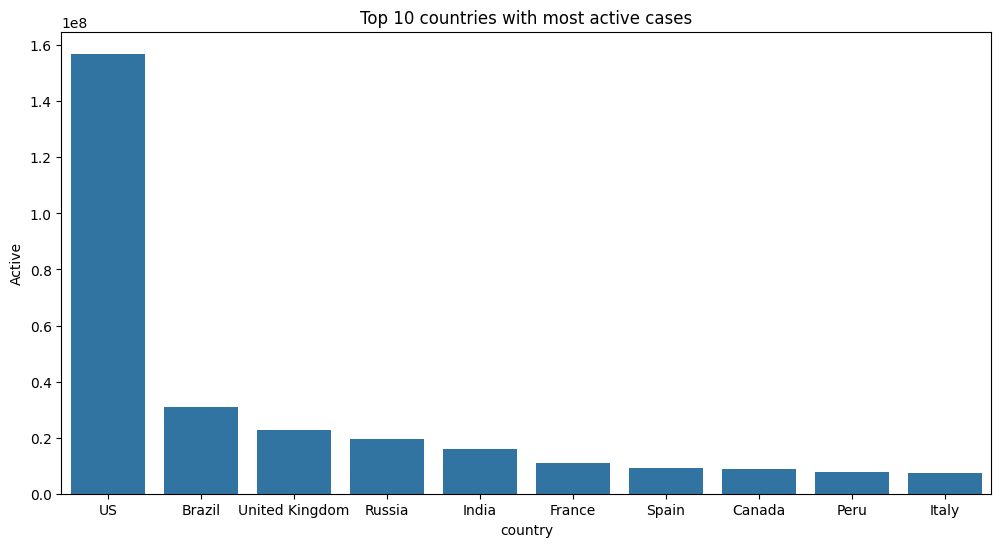

In [ ]:
# Visualizing active case
plt.figure(figsize=(12,6))
sns.barplot(x='country',y='Active',data=top_10_active)
plt.title('Top 10 countries with most active cases')
plt.show()

## Country Based Analysis

### 1. US
### 2. China
### 3. India

In [ ]:
# Creating US dataset which have country as US
US = df[df['country'] == 'US']
US.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas


In [ ]:
US = US.groupby(by='Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
US

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5
...,...,...,...,...,...
183,2020-07-23,4038816,144430,1233269,2661117
184,2020-07-24,4112531,145560,1261624,2705347
185,2020-07-25,4178970,146465,1279414,2753091
186,2020-07-26,4233923,146935,1297863,2789125


In [ ]:
# Creating China dataset which have country as China
China = df[df['country'] == 'China']
China.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific
49,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific
50,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific
51,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific
52,Gansu,China,35.7518,104.2861,2020-01-22,0,0,0,0,Western Pacific


In [ ]:
China = China.groupby(by='Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
China

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,548,17,28,503
1,2020-01-23,643,18,30,595
2,2020-01-24,920,26,36,858
3,2020-01-25,1406,42,39,1325
4,2020-01-26,2075,56,49,1970
...,...,...,...,...,...
183,2020-07-23,86045,4649,78701,2695
184,2020-07-24,86202,4650,78745,2807
185,2020-07-25,86381,4652,78813,2916
186,2020-07-26,86570,4652,78862,3056


In [ ]:
# Creating India dataset
India = df[df['country'] == 'India']
India.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia


In [ ]:
India = India.groupby(by='Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
India

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1288108,30601,817209,440298
184,2020-07-24,1337024,31358,849432,456234
185,2020-07-25,1385635,32060,885573,468002
186,2020-07-26,1435616,32771,917568,485277


## Compare these countries on the basis of Recovered cases

Text(0, 0.5, 'No. of Recovered')

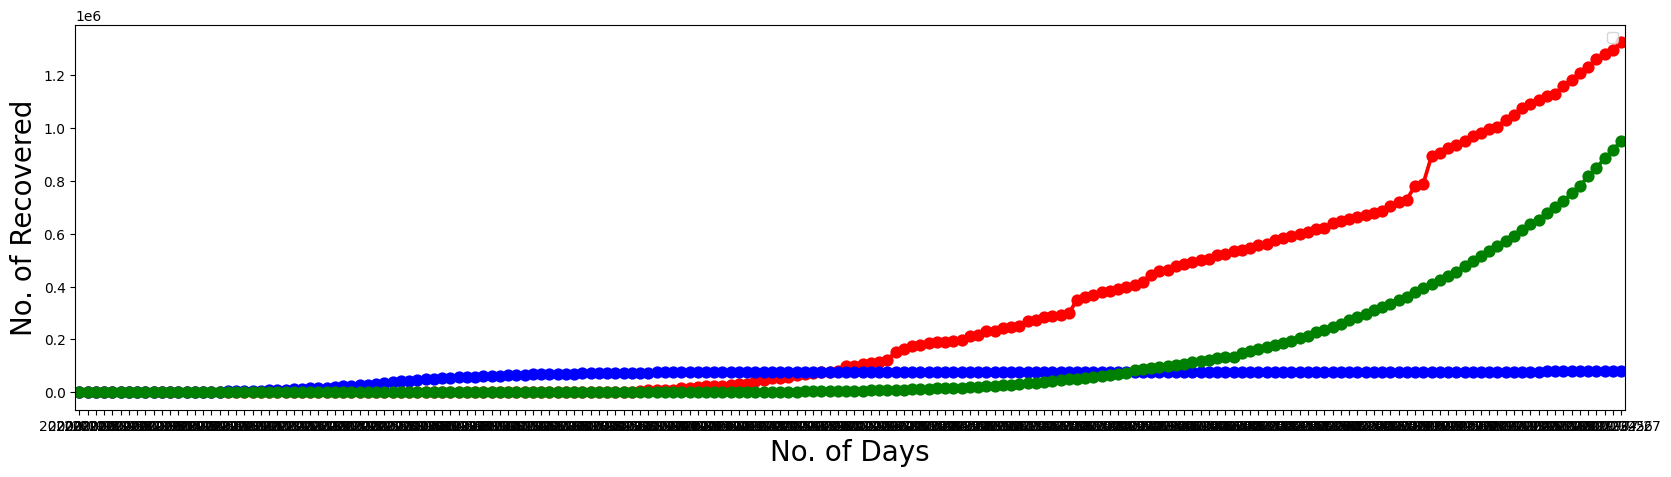

In [ ]:
# Visualizing using point plot
plt.figure(figsize=(20,5))

sns.pointplot(x='Date',y='Recovered',data=US, color='Red')
sns.pointplot(x='Date',y='Recovered',data=China, color='Blue')
sns.pointplot(x='Date',y='Recovered',data=India,color='Green')
plt.legend(loc='best')
plt.xlabel('No. of Days', fontsize = 20)
plt.ylabel('No. of Recovered', fontsize = 20)

## Compare these countries on the basis of Death cases

Text(0, 0.5, 'No. of Deaths')

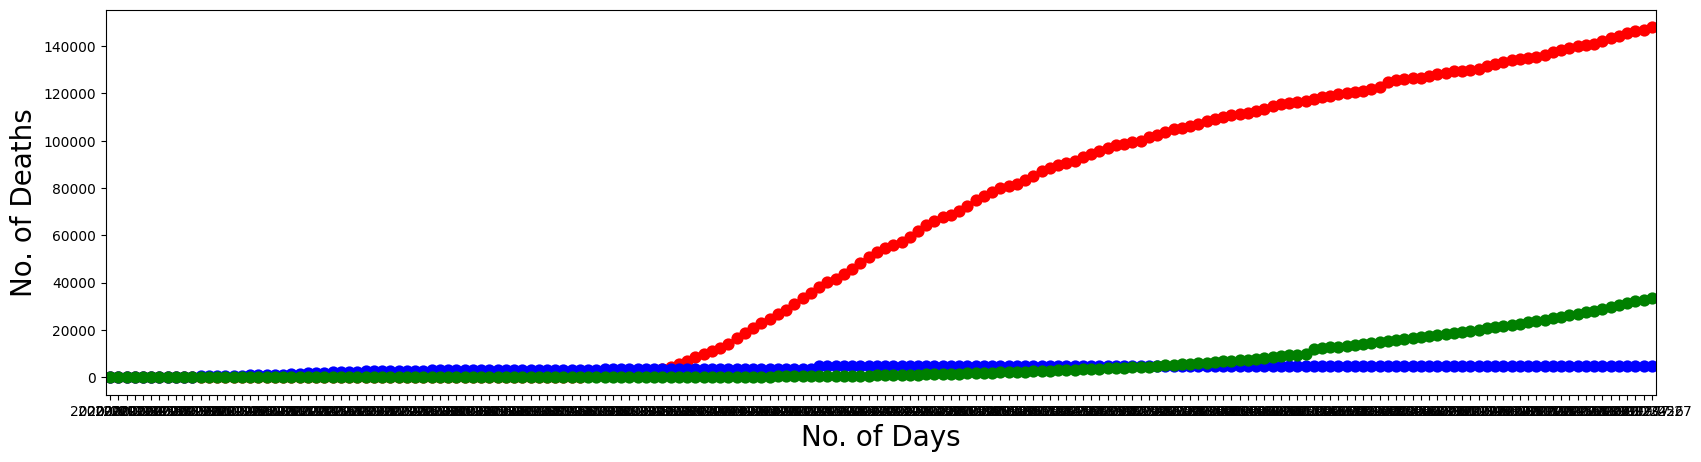

In [ ]:
# Visualizing using point plot
plt.figure(figsize=(20,5))

sns.pointplot(x='Date',y='Deaths',data=US, color='Red')
sns.pointplot(x='Date',y='Deaths',data=China, color='Blue')
sns.pointplot(x='Date',y='Deaths',data=India,color='Green')
plt.xlabel('No. of Days', fontsize = 20)
plt.ylabel('No. of Deaths', fontsize = 20)

## Compare these countries on the basis of Active cases

Text(0, 0.5, 'No. of Active')

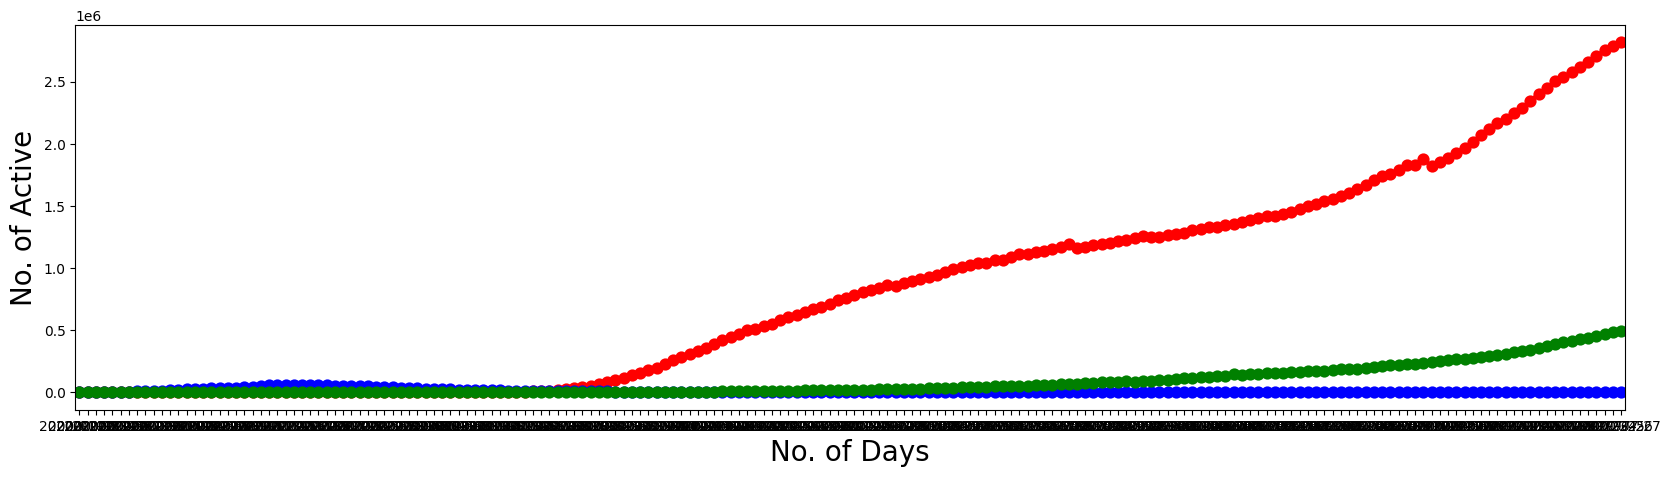

In [ ]:
# visualize using point plot
plt.figure(figsize=(20,5))

sns.pointplot(x='Date',y='Active',data=US, color='Red')
sns.pointplot(x='Date',y='Active',data=China, color='Blue')
sns.pointplot(x='Date',y='Active',data=India,color='Green')
plt.xlabel('No. of Days', fontsize = 20)
plt.ylabel('No. of Active', fontsize = 20)


# Model Building

In [ ]:
# Intalling prophet

!pip install prophet

'''
Prophet is a time series forecasting tool developed by Facebook that’s designed to be easy to use and effective for a wide range
of time series data. It’s particularly useful for data that has strong seasonal effects (like daily or weekly patterns) and includes
important dates or events that can impact the forecast.
'''

'\nProphet is a time series forecasting tool developed by Facebook that’s designed to be easy to use and effective for a wide range\nof time series data. It’s particularly useful for data that has strong seasonal effects (like daily or weekly patterns) and includes\nimportant dates or events that can impact the forecast.\n'

In [ ]:
# Reading dataset
df1 = pd.read_csv('/content/drive/MyDrive/Projects/Covid 19 project/Covid_19_Clean_Complete.csv', parse_dates=['Date'])
df1.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
# creating new dataset of Confirmed case
confirmed = df1.groupby(by='Date')['Confirmed'].sum().reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
# creating new dataset of Deaths cases
deaths = df1.groupby(by='Date')['Deaths'].sum().reset_index()
deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [ ]:
# creating new dataset of Recovered cases
recovered = df1.groupby(by='Date')['Recovered'].sum().reset_index()
recovered

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [ ]:
# creating new dataset of Active cases
active = df1.groupby(by='Date')['Active'].sum().reset_index()
active

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


## Forecasting for confirmed cases

In [ ]:
# renaming confirmed columns to ds and y
confirmed.columns = ['ds','y']
confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
# importing prophet library
from prophet import Prophet

In [ ]:
m = Prophet()
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7eazrhj/4g23gvt5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7eazrhj/kyav8ver.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97986', 'data', 'file=/tmp/tmpp7eazrhj/4g23gvt5.json', 'init=/tmp/tmpp7eazrhj/kyav8ver.json', 'output', 'file=/tmp/tmpp7eazrhj/prophet_modeluegn3430/prophet_model-20250403051847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:18:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:18:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Making prediction for next 7 dates
future = m.make_future_dataframe(periods=7)

forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.307194e+05,8.368616e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.195123e+05,9.181782e+04,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-1.020836e+05,1.030481e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-9.376257e+04,1.210755e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-9.382363e+04,1.070187e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.664133e+07,1.685384e+07,1.673971e+07,1.674930e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.684956e+07,1.706681e+07,1.693766e+07,1.696039e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.705751e+07,1.727705e+07,1.713439e+07,1.717277e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.725391e+07,1.748551e+07,1.733126e+07,1.738402e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07


In [ ]:
'''
ds:
This column contains the dates for which the predictions have been made. It stands for "date stamp."

yhat:
This is the predicted value (forecast) for the given date in the ds column. It represents the model's best estimate for that point in time.

yhat_upper:
This column represents the upper bound of the predicted value, which indicates the higher end of the confidence interval.
It suggests that the actual value is unlikely to exceed this amount, giving you an idea of the prediction's uncertainty.

yhat_lower:
This column represents the lower bound of the predicted value, indicating the lower end of the confidence interval. It suggests that the actual value is unlikely to be lower than this amount.
'''

'\nds:\nThis column contains the dates for which the predictions have been made. It stands for "date stamp."\n\nyhat:\nThis is the predicted value (forecast) for the given date in the ds column. It represents the model\'s best estimate for that point in time.\n\nyhat_upper:\nThis column represents the upper bound of the predicted value, which indicates the higher end of the confidence interval.\nIt suggests that the actual value is unlikely to exceed this amount, giving you an idea of the prediction\'s uncertainty.\n\nyhat_lower:\nThis column represents the lower bound of the predicted value, indicating the lower end of the confidence interval. It suggests that the actual value is unlikely to be lower than this amount.\n'

In [ ]:
forecast[['ds','yhat','yhat_upper','yhat_lower']]

,ds,yhat,yhat_upper,yhat_lower
0,2020-01-22,-2.067684e+04,8.368616e+04,-1.307194e+05
1,2020-01-23,-8.050948e+03,9.181782e+04,-1.195123e+05
2,2020-01-24,5.827455e+03,1.030481e+05,-1.020836e+05
3,2020-01-25,1.217668e+04,1.210755e+05,-9.376257e+04
4,2020-01-26,8.405020e+03,1.070187e+05,-9.382363e+04
...,...,...,...,...
190,2020-07-30,1.674391e+07,1.685384e+07,1.664133e+07
191,2020-07-31,1.695910e+07,1.706681e+07,1.684956e+07
192,2020-08-01,1.716676e+07,1.727705e+07,1.705751e+07
193,2020-08-02,1.736430e+07,1.748551e+07,1.725391e+07


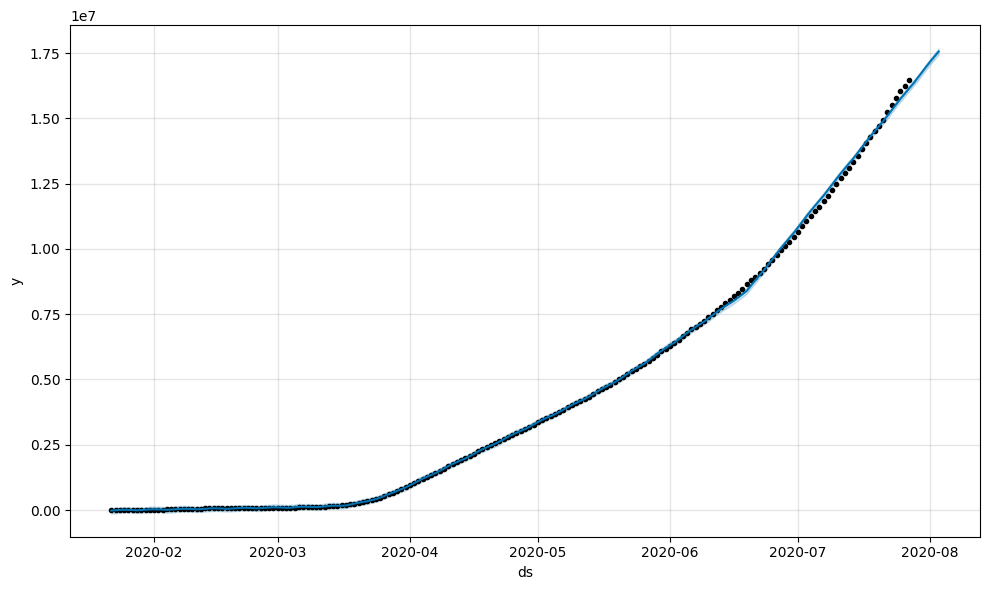

In [ ]:
# Visualizing
m.plot(forecast)
plt.show()